The following models has been fit for a celeand CCPP data set: </br>
</br>
(1) ---Simple Linear Regression (SLR): </br>
(2) Linear Regression (LR):</br>
(3) ---Least Median Square (LMS):</br>
(4) Multi Layer Perceptron (MLP):</br>
(5) Radial Basis Function Neural Network (RBF):</br>
(6) Pace Regression (PR):</br>
(7) Support Vector Poly Kernel Regression (SMOReg):</br>
(8) IBk Linear NN Search (IBk):</br>
(9) KStar (K⁄)</br>
(10) Locally Weighted Learning (LWL)</br>
(11) Additive Regression (AR):</br>
(12) Bagging REP Tree (BREP):</br>
(13) Model Trees Rules (M5R):</br>
(14) Model Trees Regression (M5P):</br>
(15) Reduced Error Pruning (REP) Trees:</br>

Import packages and Read data

In [1]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Get the current working directory
cwd = os.getcwd()
print("Current working directory:", cwd)
pd_train = pd.read_excel(r'02_data/Train.xlsx')
pd_test = pd.read_excel(r'02_data/Test.xlsx')
print(pd_train.shape)
print(pd_test.shape)

Current working directory: c:\basic_projects\AI_kurzus\beadando\01_regression_model\01_main
(8568, 5)
(1000, 5)


(1) Simple Linear Regression (SLR): </br>



Coefficients: [-1.96797472  0.0711084  -0.23928984 -0.15846725]
Intercept: 445.6126520964276
Mean Squared Error: 18.60311174933305
R-squared Score: 0.9323494943464284


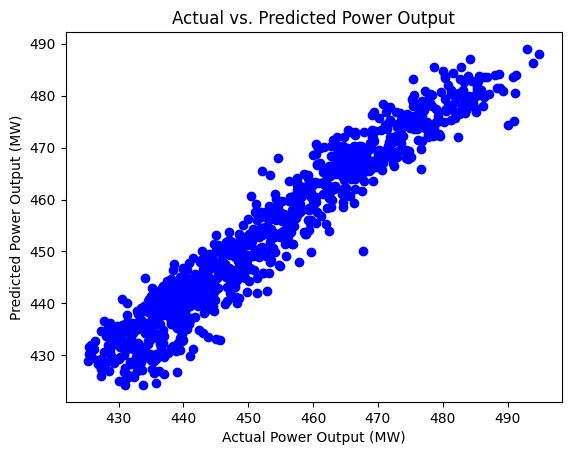

In [31]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the training data
pd_train = pd.read_excel(r'C:\basic_projects\AI_kurzus\beadando\01_regression_model\01_main\02_data\filtered_train_data.xlsx')

# Load the test data
pd_test = pd.read_excel(r'02_data/Test.xlsx')  # Update this path

# Selecting the features and target for the training set
X_train = pd_train[['AT', 'AP', 'V', 'RH']]  # Features: Ambient Temperature, Pressure, Vacuum, Humidity
Y_train = pd_train['PE']  # Target: Power Output

# Selecting the features and target for the test set
X_test = pd_test[['AT', 'AP', 'V', 'RH']]  # Ensure the same features as the training set
Y_test = pd_test['PE']

# Creating the linear regression model
model = LinearRegression()

# Fitting the model to the training data
model.fit(X_train, Y_train)

# Making predictions on the test set
Y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(Y_test, Y_pred)
r2 = model.score(X_test, Y_test)  # Directly using the model's score method to compute R-squared

# Printing the results
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

# Plotting actual vs predicted values
plt.scatter(Y_test, Y_pred, color='blue')
plt.xlabel('Actual Power Output (MW)')
plt.ylabel('Predicted Power Output (MW)')
plt.title('Actual vs. Predicted Power Output')
plt.show()


(4) Multi Layer Perceptron (MLP):</br>

In [62]:
from sklearn.neural_network import MLPRegressor
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the training data
pd_train = pd.read_excel(r'C:\basic_projects\AI_kurzus\beadando\01_regression_model\01_main\02_data\filtered_train_data.xlsx')

# Load the test data
pd_test = pd.read_excel(r'02_data/Test.xlsx')  # Update this path

# Selecting the features and target for the training set
X_train = pd_train[['AT', 'AP', 'V', 'RH']]  # Features: Ambient Temperature, Pressure, Vacuum, Humidity
Y_train = pd_train['PE']  # Target: Power Output

# Selecting the features and target for the test set
X_test = pd_test[['AT', 'AP', 'V', 'RH']]  # Ensure the same features as the training set
Y_test = pd_test['PE']

# Creating the linear regression model
LR =  LinearRegression()
RidgeRegression = Ridge(alpha=1.0)
RandomForest = RandomForestRegressor(n_estimators=100)
MultilayerPerceptron  =  MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam')

models = {
    'LinearRegression': LR,
    'RidgeRegression': RidgeRegression,
    'RandomForest': RandomForest,
    'MLPRegressor': MultilayerPerceptron
}
results = {}

for model_name, model in models.items():
    print('\n'+f"Fitting and evaluating {model_name}")
    # Fitting the model to the training data
    model.fit(X_train, Y_train)
    
    # Making predictions on the test set
    Y_pred = model.predict(X_test)

    # Evaluating the model
    mse = mean_squared_error(Y_test, Y_pred)
    r2 = model.score(X_test, Y_test)  # Directly using the model's score method to compute R-squared
    
    if any(model,'coef_'): 
        result = { 
            "Coefficients" : model.coef_,
            "Intercept": model.intercept_,
            "MeanSquaredError": mse,
            "R-squaredScore": r2
        }
        
    
    results[model_name] = result
    
    # Printing the results
    print("Coefficients:", results[model_name]["Coefficients"] )
    print("Intercept:", model.intercept_)
    print("Mean Squared Error:", mse)
    print("R-squared Score:", r2)
    
   




# Evaluating the model
mse = mean_squared_error(Y_test, Y_pred)
r2 = model.score(X_test, Y_test)  # Directly using the model's score method to compute R-squared

# Printing the results
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

# Plotting actual vs predicted values
plt.scatter(Y_test, Y_pred, color='blue')
plt.xlabel('Actual Power Output (MW)')
plt.ylabel('Predicted Power Output (MW)')
plt.title('Actual vs. Predicted Power Output')
plt.show()







Fitting and evaluating LinearRegression


TypeError: any() takes exactly one argument (2 given)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Fitting and evaluating LinearRegression

Mean Squared Error: 18.60311174933305
R-squared Score: 0.9323494943464284
Coefficients: [-1.96797472  0.0711084  -0.23928984 -0.15846725]
Intercept: 445.6126520964276


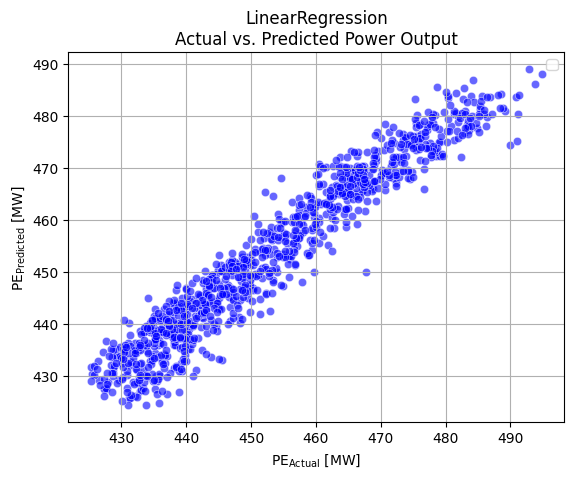

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Fitting and evaluating RidgeRegression

Mean Squared Error: 18.6031264600854
R-squared Score: 0.9323494408505484
Coefficients: [-1.96795096  0.07111449 -0.23929883 -0.15846326]
Intercept: 445.60621605979577


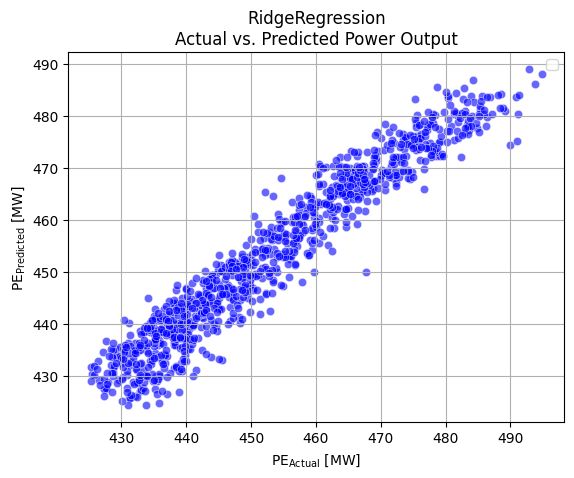


Fitting and evaluating RandomForest



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Mean Squared Error: 9.200871269279963
R-squared Score: 0.9665408883090474


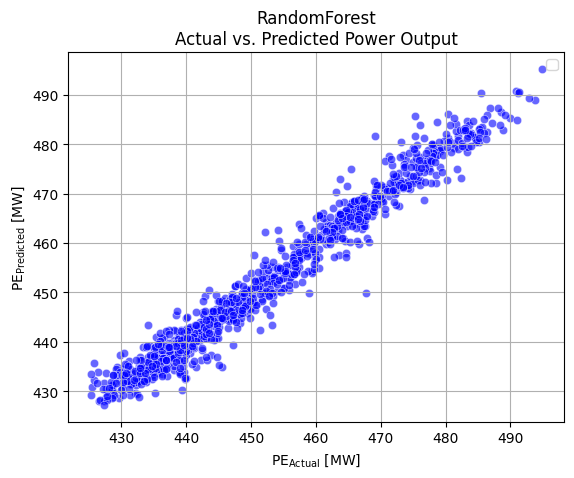


Fitting and evaluating MLPRegressor



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Mean Squared Error: 20.80970718120711
R-squared Score: 0.9243251756867025


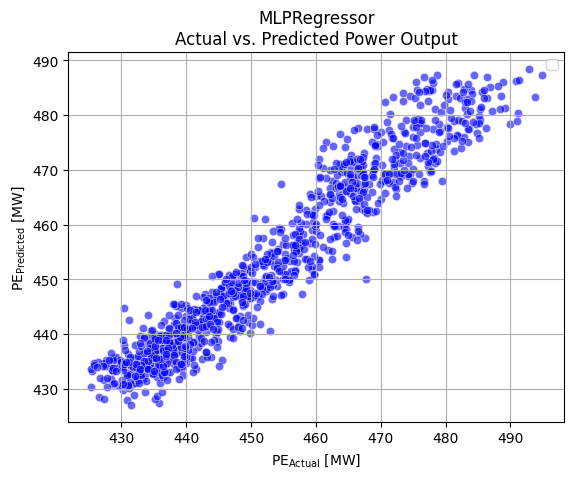

In [84]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


from colorama import Fore, Back, Style

# Load the training and test data
pd_train = pd.read_excel(r'C:\basic_projects\AI_kurzus\beadando\01_regression_model\01_main\02_data\filtered_train_data.xlsx')
pd_test = pd.read_excel(r'02_data/Test.xlsx')  # Make sure this path is correct

# Selecting the features and target for both training and test sets
X_train = pd_train[['AT', 'AP', 'V', 'RH']]  # Features
Y_train = pd_train['PE']  # Target
X_test = pd_test[['AT', 'AP', 'V', 'RH']]  # Ensure the same features as the training set
Y_test = pd_test['PE']

# Creating the models
LR = LinearRegression()
RidgeRegression = Ridge(alpha=1.0)
RandomForest = RandomForestRegressor(n_estimators=100)
MultilayerPerceptron = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam')

models = {
    'LinearRegression': LR,
    'RidgeRegression': RidgeRegression,
    'RandomForest': RandomForest,
    'MLPRegressor': MultilayerPerceptron
}
results = {}

# Fitting models and making predictions
for model_name, model in models.items():
    print('\n' + 'Fitting and evaluating ' + Fore.YELLOW + f"{model_name}")
    print(Style.RESET_ALL)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)

    mse = mean_squared_error(Y_test, Y_pred)
    r2 = model.score(X_test, Y_test)
    print(f"Mean Squared Error: {mse}\nR-squared Score: {r2}")
    model_coef_exist = False
    if hasattr(model, 'coef_'):
        print(f"Coefficients: {model.coef_}")
        model_coef_exist = True 
    model_intercept_exist = False
    if hasattr(model, 'intercept_'):
        model_intercept_exist = True
        print(f"Intercept: {model.intercept_}")

    results[model_name] = {
        "MSE": mse,
        "R2": r2,
        "Y_pred": Y_pred
    }

    # Optionally, visualize results for a specific model
    
    
    # Create a DataFrame for easier plotting with Seaborn
    data = pd.DataFrame({
        'Actual': Y_test,
        'Predicted': Y_pred
    })
    ax = sns.scatterplot(x='Actual', y='Predicted', data=data, color='blue', alpha=0.6)
    
    # Max value for plotting the perfect fit line
    max_value = max(data['Actual'].max(), data['Predicted'].max())

    # Perfect fit line (where predicted equals actual)
    plt.plot([0, max_value], [0, max_value], 'k--', lw=2, label='Perfect Fit')  # Black dashed line

    # Calculate the trend line (linear fit) to represent the fitted line
    z = np.polyfit(data['Actual'], data['Predicted'], 1)
    p = np.poly1d(z)
    plt.plot(data['Actual'], p(data['Actual']), "r-", label='Fitted Line')  # Red solid line

    
    
    
    ax.set(xlabel=r'PE$_{\text{Actual}}$ [MW]',  # Subscript for 'Actual'
           ylabel=r'PE$_{\text{Predicted}}$ [MW]',  # Subscript for 'Predicted'
           title=f'{model_name}\nActual vs. Predicted Power Output')
    plt.legend()
    plt.grid(True)
    plt.show()


(5) Radial Basis Function Neural Network (RBF):</br>

In [32]:
from sklearn.svm import SVR
rbf_svm_model = SVR(kernel='rbf')


(7) Support Vector Poly Kernel Regression (SMOReg):</br>

In [ ]:
from sklearn.svm import SVR
svm_poly_model = SVR(kernel='poly')


K-nearest Neighbors

In [34]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=5)


(12) Bagging REP Tree (BREP):</br>


In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
bagging_model = BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=10)


In [30]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import numpy as np

# Adatok és modell példányok
X, y = np.array([[1, 2], [3, 4], [5, 6], [7, 8]]), np.array([1, 2, 3, 4])  # Példa adatok
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Support Vector Regression': SVR()
}

# Keresztvalidációs konfiguráció
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# Keresztvalidáció minden modellen
for name, model in models.items():
    cv_results = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
    print(f'{name} CV MSE: {-cv_results.mean()}')  # Negatív MSE átlagát pozitívvá tesszük


Linear Regression CV MSE: 6.573840876841765e-32
Decision Tree CV MSE: 1.0
Support Vector Regression CV MSE: 1.4965100374059315
